In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size = 100) #-3到3之间随机取100个值
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 +np.random.normal(0, 1, size=100)

In [2]:
from sklearn.preprocessing import PolynomialFeatures #其实就是对数据预处理，添加x平方的特征
poly = PolynomialFeatures(degree=2) # degree：为原本数据集添加多少次幂
poly.fit(X)
X2 = poly.transform(X)
X2.shape

(100, 3)

In [3]:
X2[:5, :] #分别为0次幂、1次幂、2次幂

array([[ 1.        ,  2.16342508,  4.68040808],
       [ 1.        ,  2.41852932,  5.84928408],
       [ 1.        ,  1.33779006,  1.78968225],
       [ 1.        , -1.34152827,  1.7996981 ],
       [ 1.        ,  2.12136423,  4.5001862 ]])

In [4]:
X[:5, :]

array([[ 2.16342508],
       [ 2.41852932],
       [ 1.33779006],
       [-1.34152827],
       [ 2.12136423]])

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

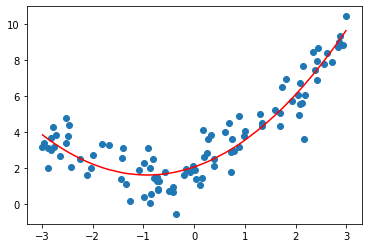

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)],color='r')
plt.show()

In [8]:
lin_reg2.coef_ # 0代表对第一列的拟合为0

array([0.        , 0.96802298, 0.52383612])

In [9]:
lin_reg2.intercept_

2.0644551291622077

#### 关于PolynomialFeatures

In [10]:
X = np.arange(1, 11).reshape(-1, 2)
X.shape

(5, 2)

In [14]:
poly2 = PolynomialFeatures(degree=2)
poly2.fit(X)
X2 = poly2.transform(X)

(5, 6)
[[  1.   1.   2.   1.   2.   4.]
 [  1.   3.   4.   9.  12.  16.]
 [  1.   5.   6.  25.  30.  36.]
 [  1.   7.   8.  49.  56.  64.]
 [  1.   9.  10.  81.  90. 100.]]


In [15]:
poly2 = PolynomialFeatures(degree=3)
poly2.fit(X)
X2 = poly2.transform(X)
print(X2.shape)
print(X2) #相关解读看笔记

(5, 10)
[[   1.    1.    2.    1.    2.    4.    1.    2.    4.    8.]
 [   1.    3.    4.    9.   12.   16.   27.   36.   48.   64.]
 [   1.    5.    6.   25.   30.   36.  125.  150.  180.  216.]
 [   1.    7.    8.   49.   56.   64.  343.  392.  448.  512.]
 [   1.    9.   10.   81.   90.  100.  729.  810.  900. 1000.]]


#### Pipeline管道 （可以将多个步骤组合在一起进行使用）

In [16]:
x = np.random.uniform(-3, 3, size = 100) #-3到3之间随机取100个值
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 +np.random.normal(0, 1, size=100)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([ #优化了步骤
    ("PolynomialFeatures", PolynomialFeatures(degree=2)),
    ("StandardScaler", StandardScaler()),
    ("LinearRegression", LinearRegression())
])

pipeline.fit(X, y)
y_predict = pipeline.predict(X)

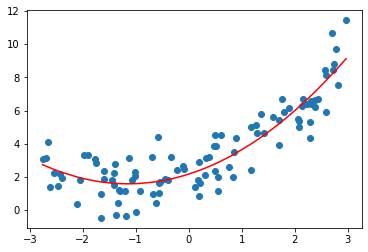

In [18]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)],color='r')
plt.show() 